In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
life_expectancy_path = "life_expectancy.csv"

life_expectancy_data = pd.read_csv(life_expectancy_path)

life_expectancy_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
style_dict = {
    "Mean": "{:.2f}", 
    "Median": "{:.2f}",
    "Variance": "{:.2f}", 
    "Standard Deviation": "{:.2f}",
    "Standard Error": "{:.2f}", 
    "mean": "{:.2f}",
    "median": "{:.2f}",
    "var": "{:.2f}",
    "std": "{:.2f}",
    "sem":"{:.2f}",
    'GDP': "{:.3f}",
    "percentage expenditure": "{:.2f}",
}

In [4]:
life_exp_df = life_expectancy_data.copy()

In [5]:
life_exp_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
len(life_exp_df["Country"].unique())

# 193 Countries

193

In [7]:
reduced_df = life_exp_df[['Country', 'Year', 'Status', 'Life expectancy ',
       'Alcohol', ' BMI ', 'Total expenditure','GDP', 'Population',
       'Income composition of resources', 'Schooling']].copy()

reduced_df.columns = [col.strip() for col in reduced_df.columns]

#reduced_df

In [8]:
drop_countries = ['San Marino', 'Marshall Islands', 'Cook Islands', 'Saint Kitts and Nevis', 'Niue', 'Palau', 'Dominica', 'Monaco', 'Nauru',
                  'Tuvalu']

for country in drop_countries:
    reduced_df.drop(reduced_df[reduced_df['Country'] == country].index, inplace=True)
    
#reduced_df['Country'].value_counts() #all 16
#183 countries

In [9]:
## Dropped 10 Countries - missing life expectancy data
#### San Marino, Marshall Islands, Cook Islands, Saint Kitts and Nevis, Niue, Palau, Dominica, Monaco, Nauru, Tuvalu

In [10]:
reduced_df.groupby("Country")['Schooling'].count()

#183 countries

Country
Afghanistan                           16
Albania                               16
Algeria                               16
Angola                                16
Antigua and Barbuda                   16
                                      ..
Venezuela (Bolivarian Republic of)    16
Viet Nam                              16
Yemen                                 16
Zambia                                16
Zimbabwe                              16
Name: Schooling, Length: 183, dtype: int64

In [11]:
school_df = reduced_df[['Country', 'Year','Status','Life expectancy','BMI', 'GDP', 'Schooling']]

school_df

,Country,Year,Status,Life expectancy,BMI,GDP,Schooling
0,Afghanistan,2015,Developing,65.0,19.1,584.259210,10.1
1,Afghanistan,2014,Developing,59.9,18.6,612.696514,10.0
2,Afghanistan,2013,Developing,59.9,18.1,631.744976,9.9
3,Afghanistan,2012,Developing,59.5,17.6,669.959000,9.8
4,Afghanistan,2011,Developing,59.2,17.2,63.537231,9.5
...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,27.1,454.366654,9.2
2934,Zimbabwe,2003,Developing,44.5,26.7,453.351155,9.5
2935,Zimbabwe,2002,Developing,44.8,26.3,57.348340,10.0
2936,Zimbabwe,2001,Developing,45.3,25.9,548.587312,9.8


In [12]:
drop_countries_schooling = ['Czechia',"Côte d'Ivoire","Democratic People's Republic of Korea", 
                            "Democratic Republic of the Congo", "Republic of Korea", "Republic of Moldova", "Somalia",
                            "United Kingdom of Great Britain and Northern Ireland","United Republic of Tanzania",
                            "United States of America"]

for country in drop_countries_schooling:
    school_df.drop(school_df[school_df['Country'] == country].index, inplace=True)

/Users/abdurrabbwatkins/opt/anaconda3/envs/pythondata/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
school_df.groupby("Country")['Schooling'].count()

#173 countries

Country
Afghanistan                           16
Albania                               16
Algeria                               16
Angola                                16
Antigua and Barbuda                   16
                                      ..
Venezuela (Bolivarian Republic of)    16
Viet Nam                              16
Yemen                                 16
Zambia                                16
Zimbabwe                              16
Name: Schooling, Length: 173, dtype: int64

## "Fig. #: Does More School = More Life?"

The correlation between average years in school and average life expectancy is 0.79


Text(0.5, 1.0, 'Fig. 1: Does More School = More Life?')

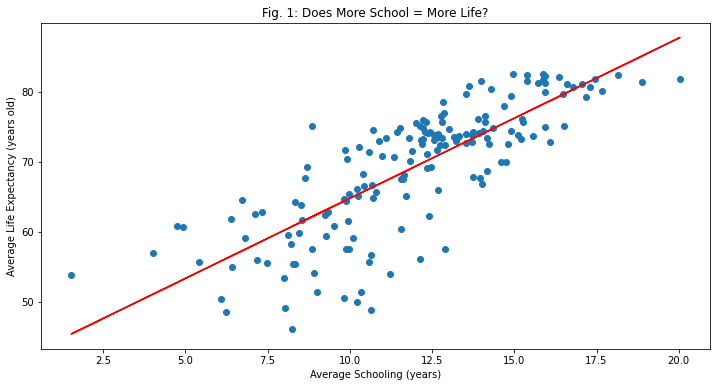

In [14]:
fig = plt.figure(figsize =(12, 6))

school_mean = school_df.groupby("Country")["Schooling"].mean()
school_mean

life_exp_mean = school_df.groupby("Country")["Life expectancy"].mean()
life_exp_mean

correlation_school_life = st.pearsonr(life_exp_mean,school_mean)
print(f"The correlation between average years in school and average life expectancy is {round(correlation_school_life[0],2)}")


x_values = school_mean
y_values = life_exp_mean
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="purple")
plt.xlabel("Average Schooling (years)")
plt.ylabel("Average Life Expectancy (years old)")
plt.title("Fig. 1: Does More School = More Life?")

In [15]:
#Split Data

school_dev = school_df.loc[school_df["Status"] == "Developed"]
len(school_dev.groupby("Country"))

29

In [16]:
school_undev = school_df.loc[school_df["Status"] == "Developing"]
len(school_undev.groupby("Country"))

144

The correlation between average years in school and average life expectancy in developed countries is 0.42


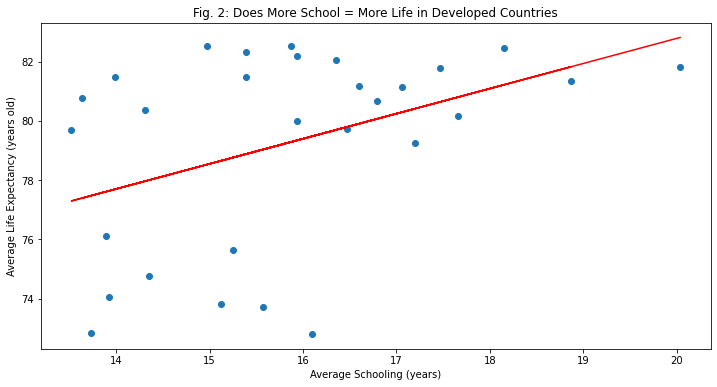

In [17]:
fig2 = plt.figure(figsize =(12, 6))

school_dev_mean = school_dev.groupby("Country")["Schooling"].mean()
school_dev_mean

life_dev_mean = school_dev.groupby("Country")["Life expectancy"].mean()
life_dev_mean

correlation_school_dev_life = st.pearsonr(life_dev_mean,school_dev_mean)
print(f"The correlation between average years in school and average life expectancy in developed countries is {round(correlation_school_dev_life[0],2)}")


x_values = school_dev_mean
y_values = life_dev_mean
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="purple")
plt.xlabel("Average Schooling (years)")
plt.ylabel("Average Life Expectancy (years old)")
plt.title("Fig. 2: Does More School = More Life in Developed Countries")

# Save the plotted figures as .pngs
fig2.get_figure()
fig2.savefig(r'More_School_Fig2.png')

The correlation between average years in school and average life expectancy is 0.74


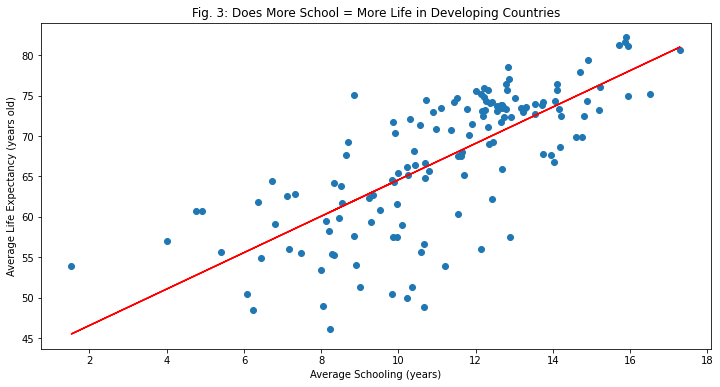

In [18]:
fig3 = plt.figure(figsize =(12, 6))

school_undev_mean = school_undev.groupby("Country")["Schooling"].mean()
school_undev_mean

life_undev_mean = school_undev.groupby("Country")["Life expectancy"].mean()
life_undev_mean

correlation_school_undev_life = st.pearsonr(life_undev_mean,school_undev_mean)
print(f"The correlation between average years in school and average life expectancy is {round(correlation_school_undev_life[0],2)}")


x_values = school_undev_mean
y_values = life_undev_mean
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="purple")
plt.xlabel("Average Schooling (years)")
plt.ylabel("Average Life Expectancy (years old)")
plt.title("Fig. 3: Does More School = More Life in Developing Countries")

# Save PNG
fig3.get_figure()
fig3.savefig(r'More_School_Fig3.png')

In [ ]:
df_div = (df["Years of Schooling"]/df["Years of Life"])*100

In [ ]:
df_div

In [ ]:
"Percent Difference" = df_div